# **Data Filtering and Preprocessing**

In [1]:
#importing the libraries
import numpy as np
from  matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [2]:
#reading the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn Prediction/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1151,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No
2849,6838-HVLXG,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,246.7,No
2658,7473-ZBDSN,Female,0,Yes,Yes,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,18.80,255.55,No
4005,2565-JSLRY,Male,0,No,No,1,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,24.05,24.05,Yes
1477,5469-CTCWN,Male,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,106.00,6547.7,Yes


In [3]:
#checking the datatypes of the dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#customer id does not make significance during model training
#so droping this column
df.drop("customerID" , axis = 'columns' , inplace = True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#looking for the rows with total charges as empty stirng
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.iloc[488]['TotalCharges']

' '

In [8]:
df.shape

(7043, 20)

In [9]:
#creating new dataframe after droping the flagged ones
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
#changing to numeric
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-10-902f05c85dbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
df1.TotalCharges.dtypes

dtype('float64')

In [12]:
# tenure signifies how loyal the customer base is
tenure_churn_no = df1[df1['Churn'] == 'No'].tenure
tenure_churn_yes = df1[df1['Churn'] == 'Yes'].tenure

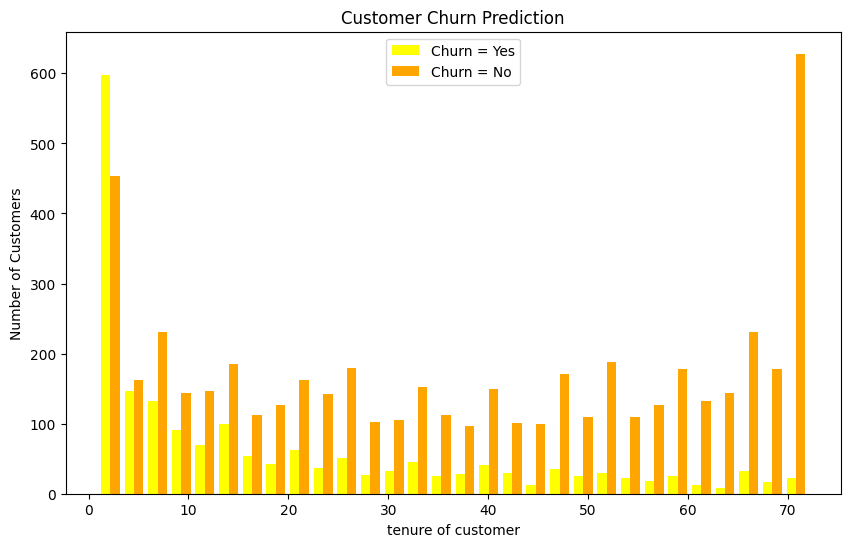

In [13]:
#plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['yellow', 'orange'], label=['Churn = Yes', 'Churn = No'], bins=30)
plt.xlabel("tenure of customer")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction")
plt.legend()
plt.show()

In [14]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [15]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [16]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-16-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-16-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [17]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
#change the yes no data types to 1 and 0
change_to_numeric_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [19]:
for col in change_to_numeric_col:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-19-33a5f86a7b72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [20]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [21]:
#change female to 1 and male to 0
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-21-8fc53b293b97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [22]:

# Applying one-hot encoding
df2 = pd.get_dummies(df1, columns=['InternetService', 'Contract', 'PaymentMethod']).astype(int)
print(df2.dtypes)
print_unique_col_values(df2)

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                             int64
TotalCharges                               int64
Churn                                      int64
InternetService_DSL                        int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_Month-to-mo

In [23]:
df2.shape

(7032, 27)

In [25]:
scale_the_colms = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[scale_the_colms] = scaler.fit_transform(df2[scale_the_colms])

# **Model Training**

In [26]:
X = df2.drop('Churn',axis='columns')
Y = df2['Churn']

In [27]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [28]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [29]:
#now splitt the data in train and test part
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(26, input_shape=(26,), activation='relu'),
    Dense(52, activation='relu'),
    Dense(26, activation='relu'),
    Dense(13, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.5015 - accuracy: 0.7440
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.7954
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8007
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8028
Epoch 5/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8064
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8075
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8087
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8096
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8082
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8153

In [45]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [46]:
yhat = (y_pred > 0.5).astype(int)

In [47]:
print(yhat)

[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]


In [48]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7527


[0.5636970400810242, 0.7526652216911316]

In [51]:
model.evaluate(X_train,Y_train)

176/176 [==============================] - 0s 1ms/step - loss: 0.2854 - accuracy: 0.8768


[0.2854309380054474, 0.876800000667572]

In [49]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(Y_test,yhat))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       999
           1       0.58      0.54      0.56       408

    accuracy                           0.75      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.75      0.75      0.75      1407



<Axes: >

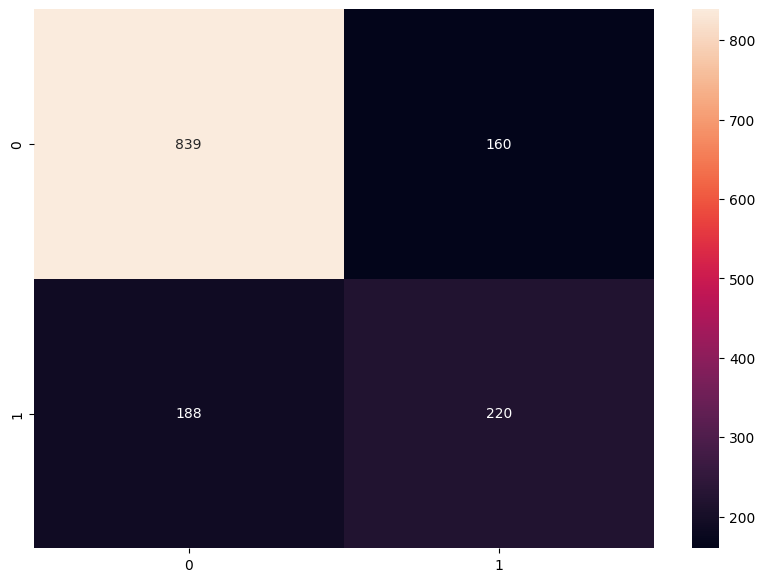

In [50]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=Y_test,predictions=yhat)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')